In [ ]:
#🎯 Diwali Sales Analysis Project

In [ ]:
## 📖 Objective
The goal of this project is to analyze **Diwali Sales Data** to uncover insights about customer demographics, purchasing behavior, and top-performing products.
By performing **data cleaning** and **exploratory data analysis (EDA)**, we aim to identify the key factors that drive sales and provide actionable business recommendations.  

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load dataset
df = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")

In [4]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop

<bound method DataFrame.drop of        User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

       

In [ ]:
## 📂 Dataset Information
- The dataset contains **11,251 rows × 15 columns**.  
- Key columns include:  
  - `User_ID` → Unique identifier for customers  
  - `Cust_name` → Customer name  
  - `Gender` → Male / Female  
  - `Age Group` & `Age` → Customer age bracket and exact age  
  - `Marital_Status` → Married / Unmarried  
  - `State` & `Zone` → Customer location  
  - `Occupation` → Profession of customer  
  - `Product_Category` → Category of purchased product  
  - `Orders` → Number of orders  
  - `Amount` → Purchase amount

In [ ]:
# Data Cleaning
## 1. Data Cleaning
- Removed unnecessary columns (`Status`, `unnamed1`).  
- Handled missing values and duplicates.  
- Converted `Amount` column into numeric type.  
- Reset index for a clean dataset.  

In [8]:
# Drop unnecessary columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
# Drop null values
df.dropna(inplace=True)

In [10]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)

In [11]:
# Convert Amount to numeric (if not already)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [12]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [13]:
print("Cleaned Dataset Shape:", df.shape)
print(df.info())

Cleaned Dataset Shape: (11231, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB
None


In [ ]:
# 🔹 Exploratory Data Analysis (EDA)
##  2 Exploratory Data Analysis (EDA)
- **Demographics**: Gender and Age group analysis.  
- **Geography**: State-wise sales distribution.  
- **Occupation**: Sales contribution by profession.  
- **Product Categories**: Top-selling product categories.

C:\Users\DELL\AppData\Local\Temp\ipykernel_868\86544177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


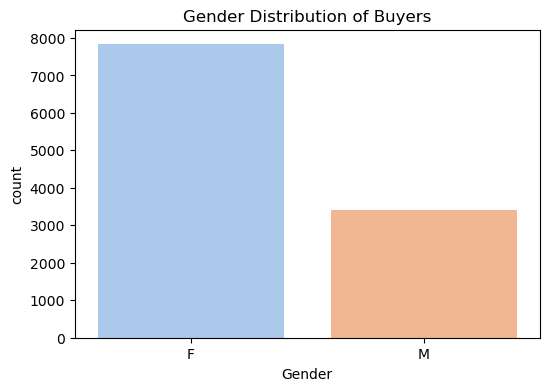

In [23]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution of Buyers")
plt.show()

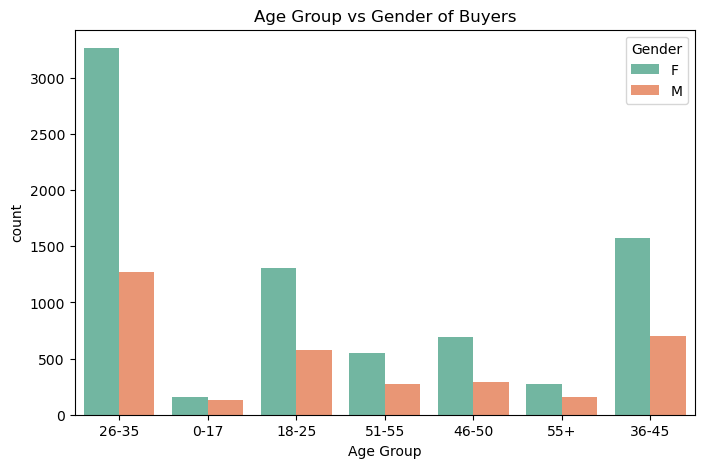

In [24]:
# Age group vs Gender
plt.figure(figsize=(8,5))
sns.countplot(x='Age Group', hue='Gender', data=df, palette='Set2')
plt.title("Age Group vs Gender of Buyers")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_868\3396583698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')


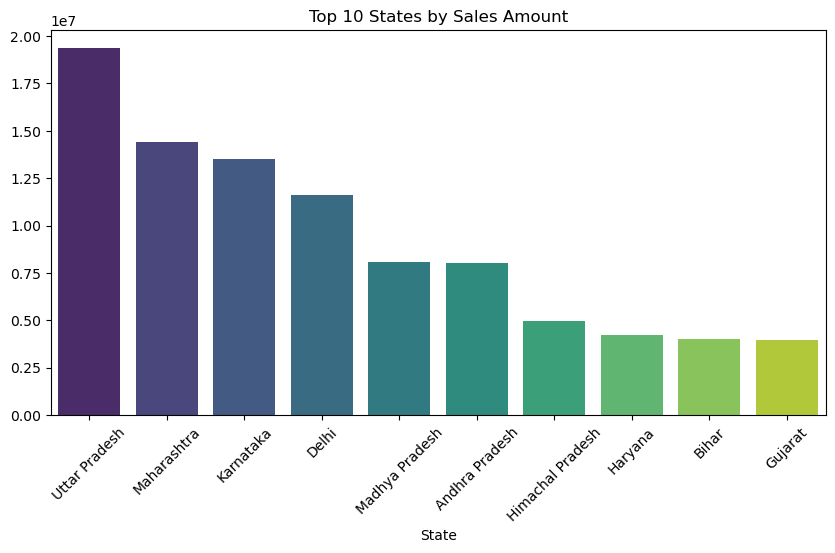

In [25]:
# Total Amount by State
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 States by Sales Amount")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_868\565061458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_sales.index, y=occupation_sales.values, palette='mako')


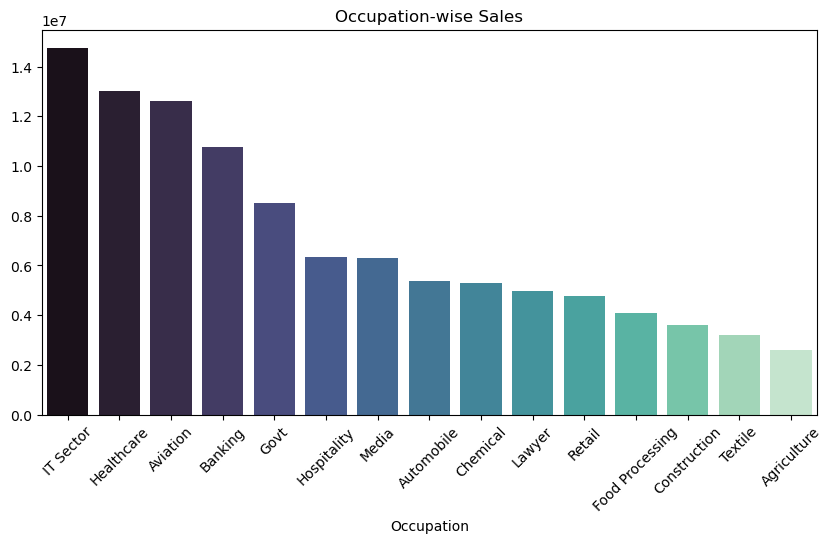

In [26]:
# Occupation analysis
occupation_sales = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=occupation_sales.index, y=occupation_sales.values, palette='mako')
plt.xticks(rotation=45)
plt.title("Occupation-wise Sales")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_868\3767302429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='cubehelix')


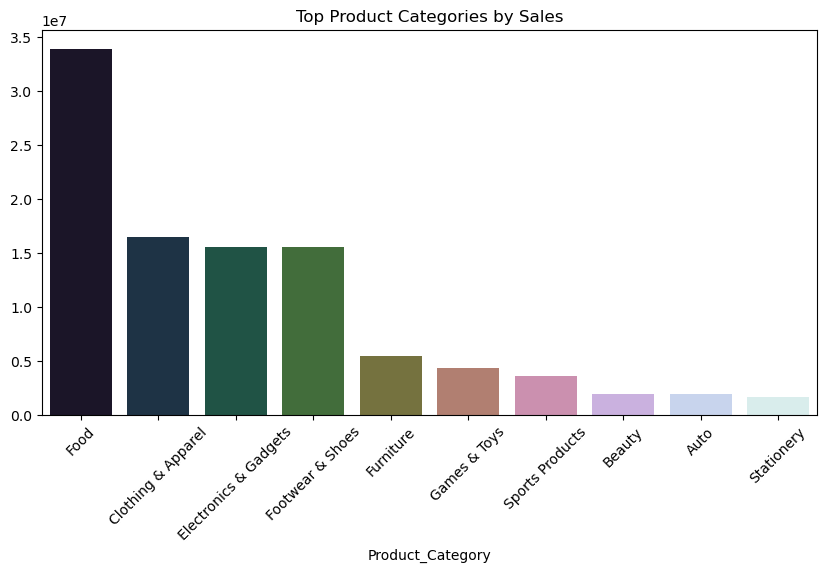

In [27]:
# Product Category analysis
product_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='cubehelix')
plt.xticks(rotation=45)
plt.title("Top Product Categories by Sales")
plt.show()

In [28]:
print("📌 Insights & Conclusion:")

📌 Insights & Conclusion:


In [29]:
print("1. Most of the buyers are Females, especially in the age group 26-35.")

1. Most of the buyers are Females, especially in the age group 26-35.


In [30]:
print("2. Maharashtra, Uttar Pradesh, and Karnataka are the top contributing states in sales.")

2. Maharashtra, Uttar Pradesh, and Karnataka are the top contributing states in sales.


In [31]:
print("3. Married women dominate the purchasing segment.")

3. Married women dominate the purchasing segment.


In [32]:
print("4. Most buyers work in IT, Healthcare, and Aviation sectors.")

4. Most buyers work in IT, Healthcare, and Aviation sectors.


In [33]:
print("5. Clothing & Apparel, Food, and Electronics are the top-selling product categories.")

5. Clothing & Apparel, Food, and Electronics are the top-selling product categories.


In [ ]:
##Business Implications 
Target Audience: Married women aged 26–35, primarily from Maharashtra, Uttar Pradesh, and Karnataka.
Marketing Strategy:
Focus promotions and advertisements on clothing, food, and electronics.
Create targeted campaigns for working professionals in IT and Healthcare sectors.
Seasonal and festive offers should be designed specifically for women in the 26–35 age group.

In [ ]:
#This analysis helps identify **who buys the most, where they are located, and what they buy the most, enabling businesses to **strategically focus marketing efforts and inventory planning.